In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


#### 1. Find out how many males and females participated in the test

In [4]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### 2. What do you think about the students' parental level of education

###### It shows that most of the parents had attended some college 

In [5]:
df['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [6]:
df['parental level of education'].mode()[0]

'some college'

#### 3. Who scores the most on average for math, reading and writing based on
#### ● Gender
#### ● Test preparation course

##### Ans)The data shows that female students scores most on average for math, reading and writing than the male students based on Gender. 
##### When considering the Test Preparation course those who completed course has the most average.


In [7]:
df['average score'] = (df['math score'] + df['writing score'] + df['reading score']) / 3

In [8]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000


In [9]:
df1 = df.groupby(['gender'])['average score']
df1.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,69.478121,14.703600,9.0,60.666667,70.333333,78.666667,100.0
male,482.0,65.937759,13.868181,23.0,56.000000,66.833333,76.333333,100.0


In [10]:
df2 = df.groupby(['test preparation course'])['average score']
df2.describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,72.942272,12.943234,34.333333,65.416667,73.833333,82.333333,100.0
none,642.0,64.888370,14.387989,9.000000,55.333333,65.333333,75.000000,100.0


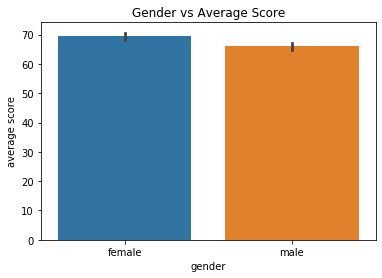

In [11]:
sns.barplot(data= df, x=df['gender'], y=df['average score'] )
plt.title('Gender vs Average Score')
plt.show()

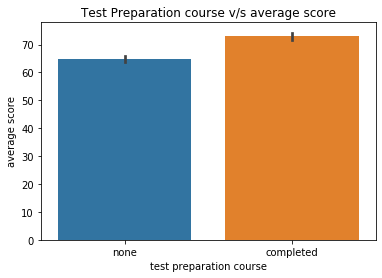

In [12]:
sns.barplot(data= df, x=df['test preparation course'], y=df['average score'] )
plt.title('Test Preparation course v/s average score')
plt.show()

#### 4. What do you think about the scoring variation for math, reading and writing based on
#### ● Gender
##### ● Test preparation course

##### Ans) Based on the graphs we can see that:
##### When considering gender : female has more score in reading and writing score when compared to males. But males have higher scores in math when compared to female.
##### When Considering Test Preparation score: In all math, reading and writing students who have completed the test preparation course have scored more



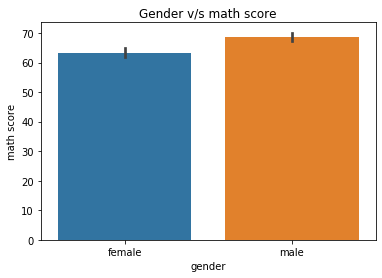

In [13]:
sns.barplot(data= df, x=df['gender'], y=df['math score'] )
plt.title('Gender v/s math score')
plt.show()

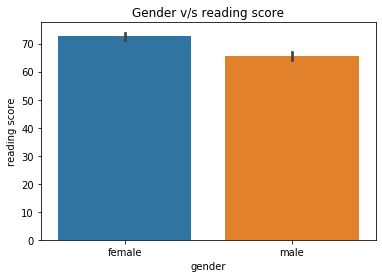

In [14]:
sns.barplot(data= df, x=df['gender'], y=df['reading score'] )
plt.title('Gender v/s reading score')
plt.show()

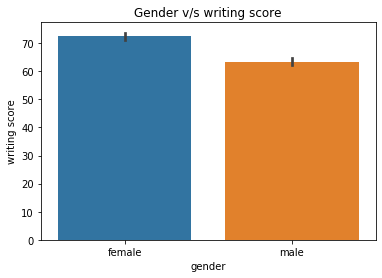

In [15]:
sns.barplot(data= df, x=df['gender'], y=df['writing score'] )
plt.title('Gender v/s writing score')
plt.show()

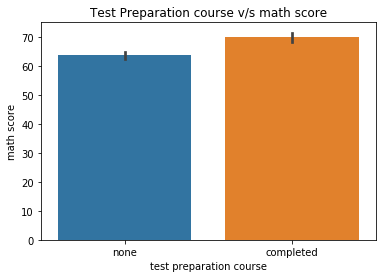

In [16]:
sns.barplot(data= df, x=df['test preparation course'], y=df['math score'] )
plt.title('Test Preparation course v/s math score')
plt.show()

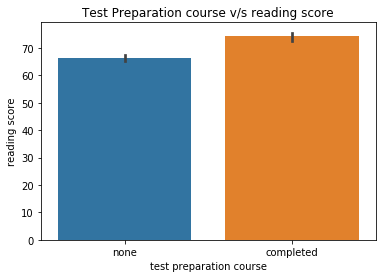

In [17]:
sns.barplot(data= df, x=df['test preparation course'], y=df['reading score'] )
plt.title('Test Preparation course v/s reading score')
plt.show()

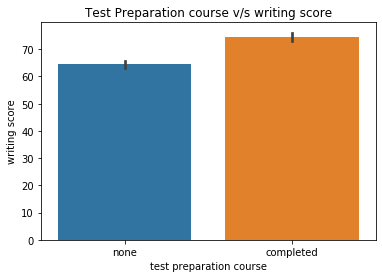

In [18]:
sns.barplot(data= df, x=df['test preparation course'], y=df['writing score'] )
plt.title('Test Preparation course v/s writing score')
plt.show()

In [19]:
df3 = df.groupby('gender')['reading score']

In [20]:
df3.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


In [21]:
df4 = df.groupby('gender')['math score']
df4.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


In [22]:
df5 = df.groupby('gender')['writing score']
df5.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


Chi-Square test of independence
H0: Math score,reading score and writing score is independent of gender.
H1: Math score, reading score and writing score is not independent of gender.

p > 0.05 so failed to reject null hypothesis

In [40]:
contingency = pd.crosstab(df['gender'], [df['math score'],df['writing score'],df['reading score']])
contingency

math score    0   8   11  13  18  19  22      23  24   ... 98      99       \
writing score 10  23  32  51  28  32  33  46  36  27   ... 90  99  81  90    
reading score 17  24  38  41  32  34  39  53  44  38   ... 87  100 87  93    
gender                                                 ...                   
female          1   1   1   1   1   1   1   1   1   1  ...   0   1   0   1   
male            0   0   0   0   0   0   0   0   0   0  ...   1   0   1   0   

math score        100                  
writing score 100 86  93  97  99  100  
reading score 100 96  100 92  97  100  
gender                                 
female          1   0   0   1   0   2  
male            0   1   1   0   1   1  

[2 rows x 978 columns]

In [41]:
c, p, dof, expected = chi2_contingency(contingency)
p

0.42559075495417287

In [42]:
if p < 0.05:
    print("Reject Null Hypothesis")
else: 
    print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis


#### Chi-Square test of independence
H0: Math score,reading score and writing score is independent of test preparation course.
H1: Math score, reading score and writing score is not independent of test preparation course.

p > 0.05 so failed to reject null hypothesis

In [43]:
contingency = pd.crosstab(df['test preparation course'], [df['math score'],df['writing score'],df['reading score']])
contingency

math score              0   8   11  13  18  19  22      23  24   ... 98       \
writing score           10  23  32  51  28  32  33  46  36  27   ... 90  99    
reading score           17  24  38  41  32  34  39  53  44  38   ... 87  100   
test preparation course                                          ...           
completed                 0   0   0   0   0   0   0   0   1   0  ...   1   0   
none                      1   1   1   1   1   1   1   1   0   1  ...   0   1   

math score              99          100                  
writing score           81  90  100 86  93  97  99  100  
reading score           87  93  100 96  100 92  97  100  
test preparation course                                  
completed                 1   0   1   1   1   0   1   1  
none                      0   1   0   0   0   1   0   2  

[2 rows x 978 columns]

In [44]:
c, p, dof, expected = chi2_contingency(contingency)
p

0.4958328227921151

In [45]:
if p < 0.05:
    print("Reject Null Hypothesis")
else: 
    print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis
